In [150]:
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch.unitroot import DFGLS
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

from VG import diffTimeSeries

plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 用来正常显示中文标签

In [151]:
df = pd.read_csv("./data/CCI/CCI.CSV")
data = df["Value"].tolist()
date = df["Date"].tolist()

In [152]:
color = [
    "#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", "#8491B4FF",
    "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]

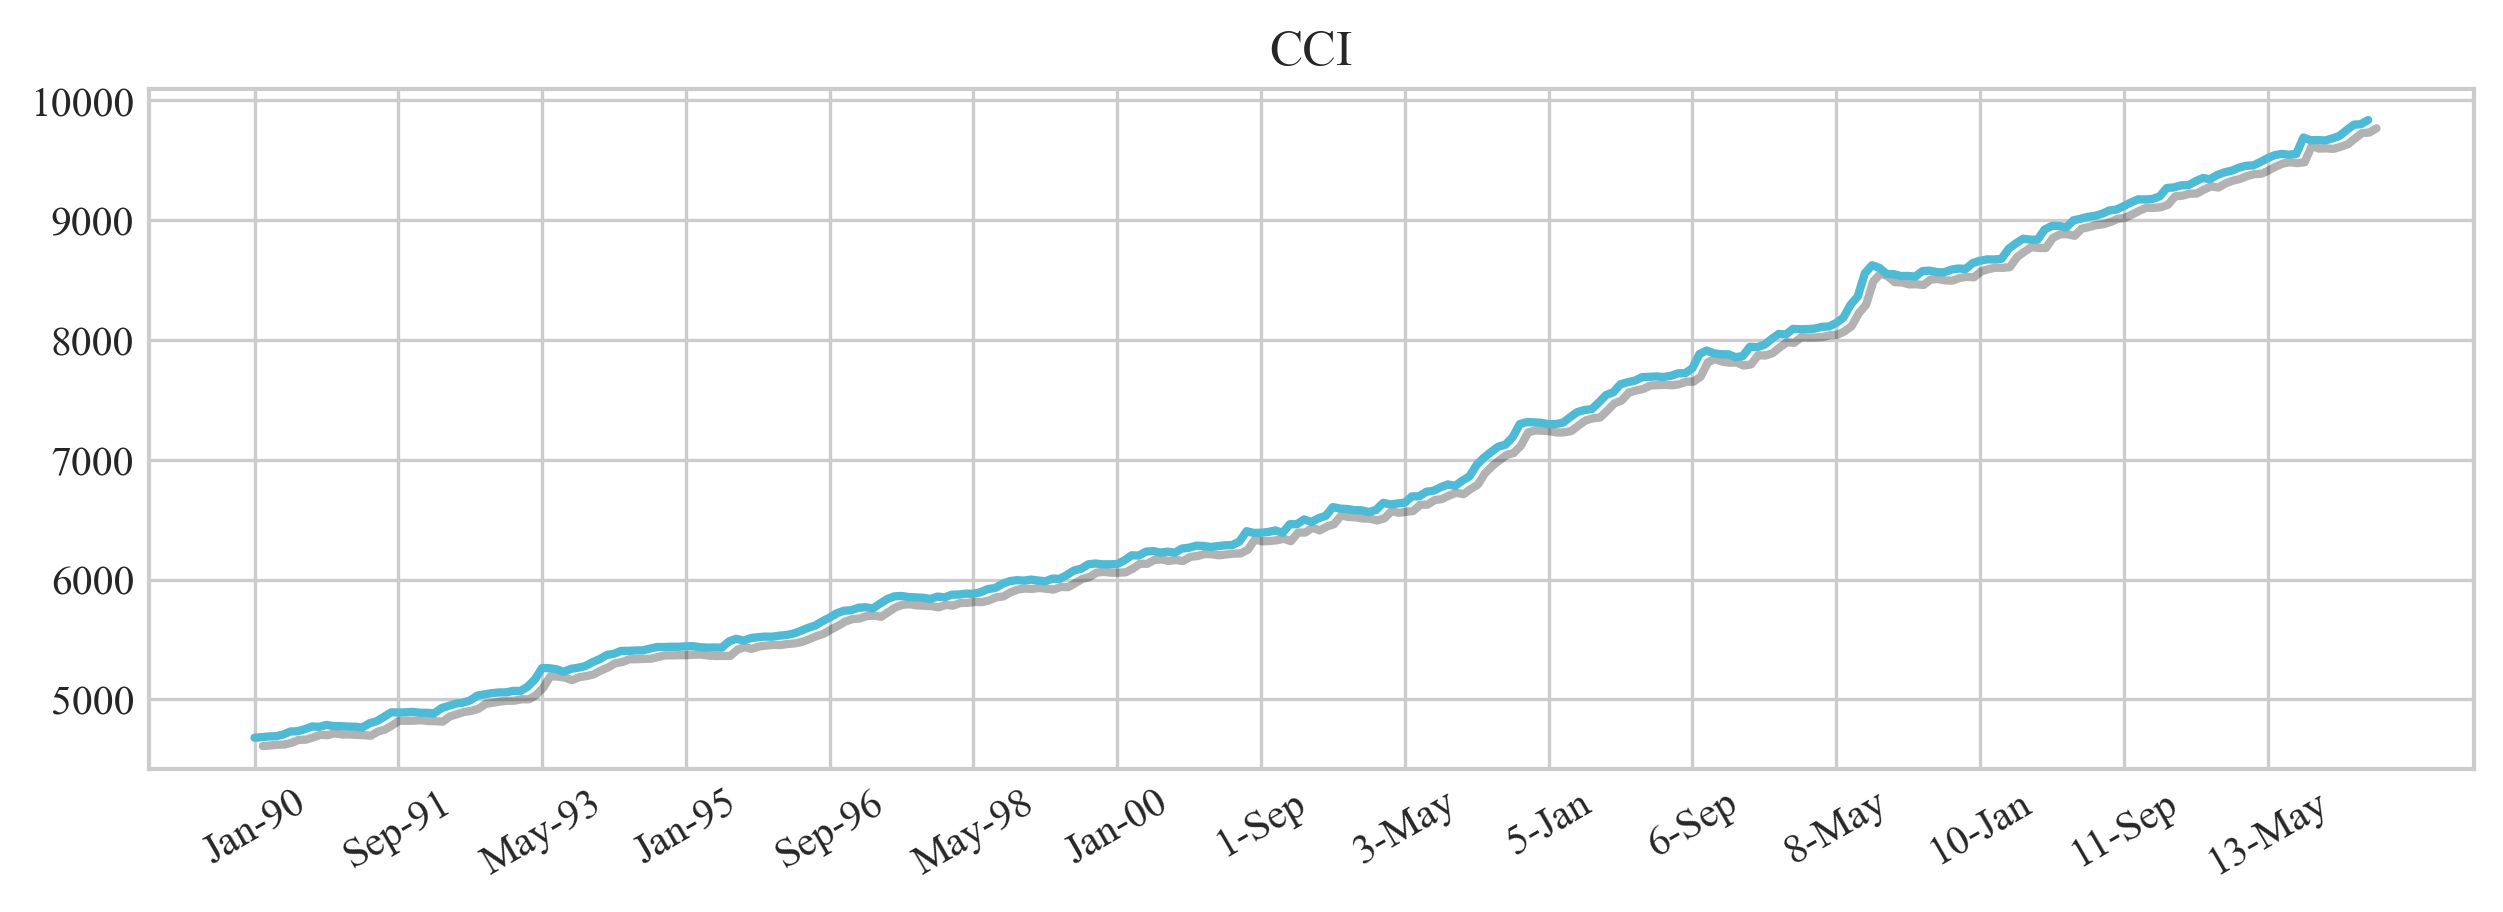

In [153]:
plt.figure(figsize=(10, 3), dpi=300)
plt.plot(range(len(data)), data, lw=2, color=color[1],
         path_effects=[pe.SimpleLineShadow(shadow_color='black'), pe.Normal()])
plt.title("CCI")
plt.xticks(range(len(data))[::20], date[::20], rotation=30)
plt.savefig("./fig/CCI.pdf")

In [154]:
sm.tsa.stattools.acf(data, nlags=1, adjusted=True)

array([1.        , 0.99343148])

In [155]:
acorr_ljungbox(data)

,lb_stat,lb_pvalue
1,292.117516,1.718599e-65
2,579.358207,1.563017e-126
3,861.683256,1.811237e-186
4,1139.175652,2.440465e-245
5,1411.933255,3.573155e-303
6,1680.028946,0.000000e+00
7,1943.467292,0.000000e+00
8,2202.224477,0.000000e+00
9,2456.296646,0.000000e+00
10,2705.582764,0.000000e+00


/Users/ztx/Documents/Code/python/实验室/WCF/experiment/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


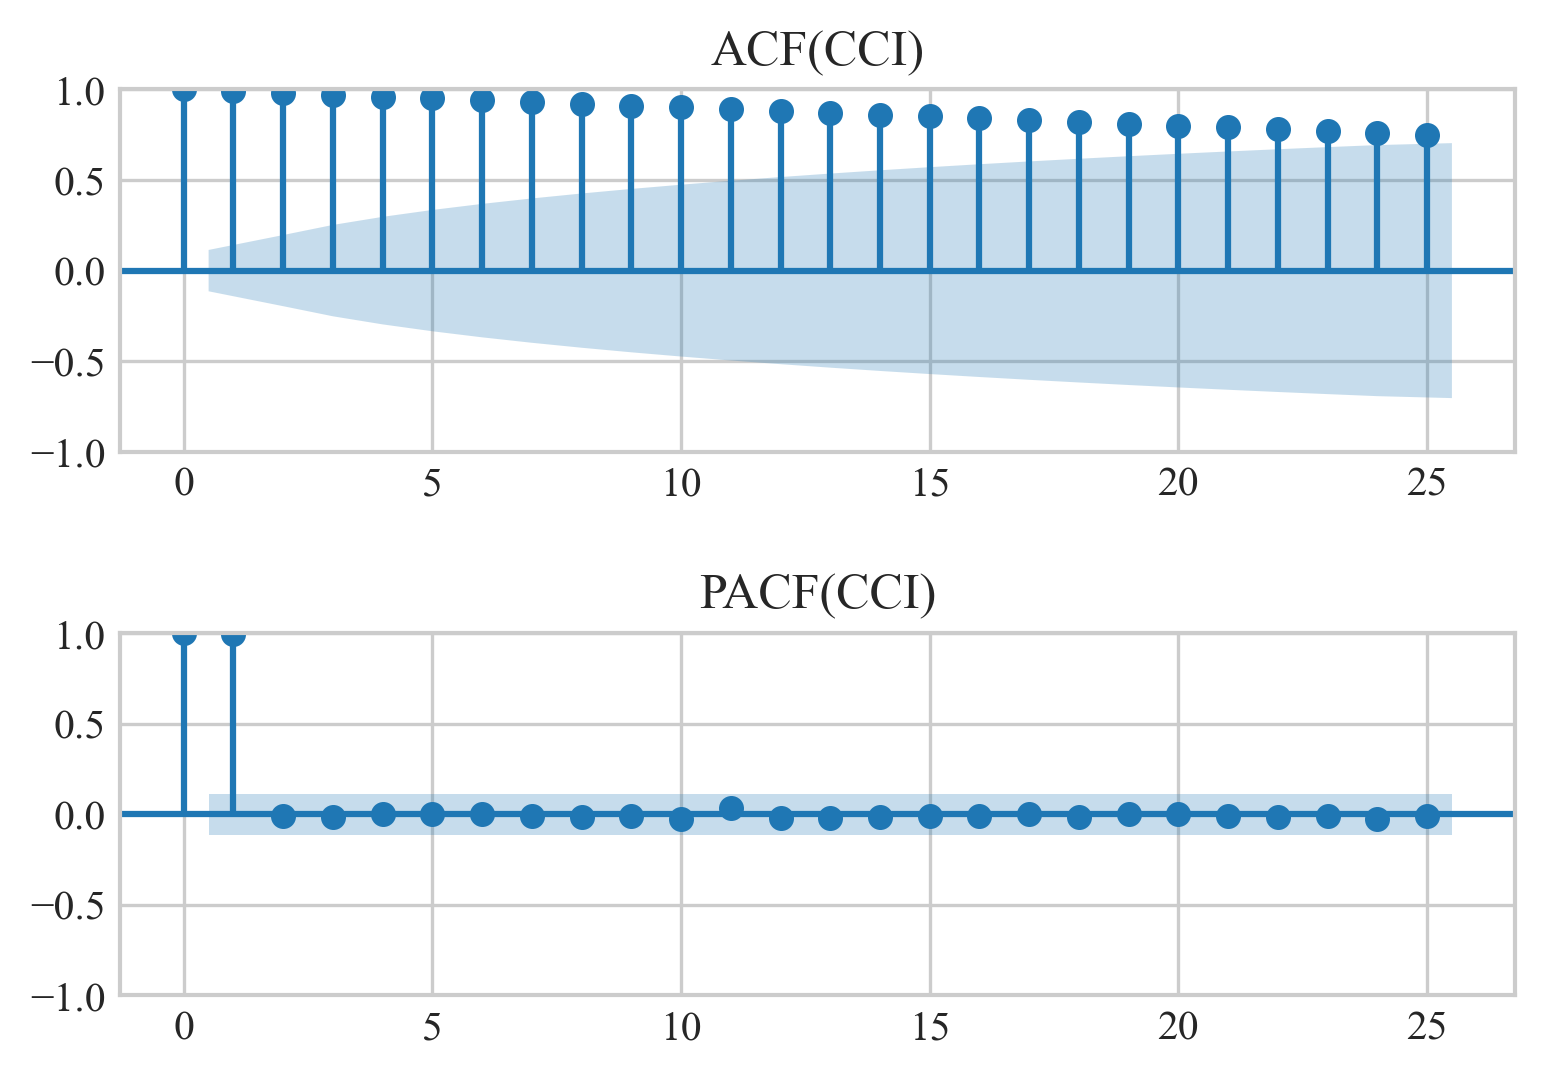

In [156]:
fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
fig.dpi = 300

plot_acf(np.array(data), ax=ax[0])
ax[0].set_title('ACF(CCI)')
plot_pacf(np.array(data), ax=ax[1])
ax[1].set_title('PACF(CCI)')
plt.savefig("./fig/CCI_ana.pdf")

In [157]:
dfgls = DFGLS(data, trend='ct')
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.500
P-value                         0.962
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.48 (1%), -2.91 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [158]:
diff_ts_l1 = diffTimeSeries.diffTimeSeries(data, date)

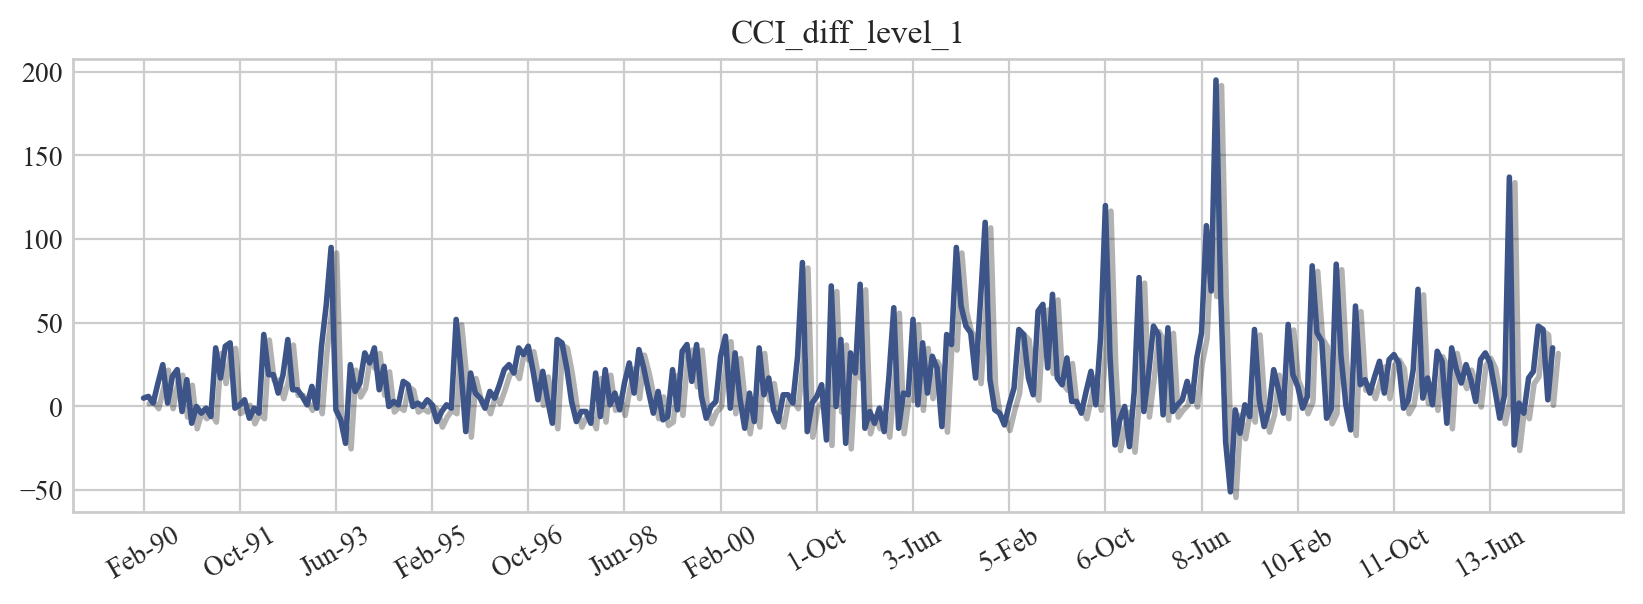

In [159]:
plt.figure(figsize=(10, 3), dpi=200)
plt.plot(range(len(diff_ts_l1.diff_series)), diff_ts_l1.diff_series, lw=2, color=color[3],
         path_effects=[pe.SimpleLineShadow(shadow_color='black'), pe.Normal()])
plt.title("CCI_diff_level_1")
plt.xticks(range(len(diff_ts_l1.diff_series))[::20], diff_ts_l1.date[::20], rotation=30)
plt.savefig("./fig/CCI_diff.pdf")

In [160]:
sm.tsa.stattools.acf(diff_ts_l1.diff_series, nlags=1, adjusted=True)

array([1.        , 0.21418857])

In [161]:
acorr_ljungbox(diff_ts_l1.diff_series)

,lb_stat,lb_pvalue
1,13.533327,0.000234
2,14.520657,0.000703
3,16.210048,0.001027
4,16.257289,0.002693
5,21.051170,0.000792
6,21.399618,0.001555
7,21.424672,0.003190
8,21.601596,0.005710
9,21.603057,0.010226
10,21.636629,0.017067


/Users/ztx/Documents/Code/python/实验室/WCF/experiment/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


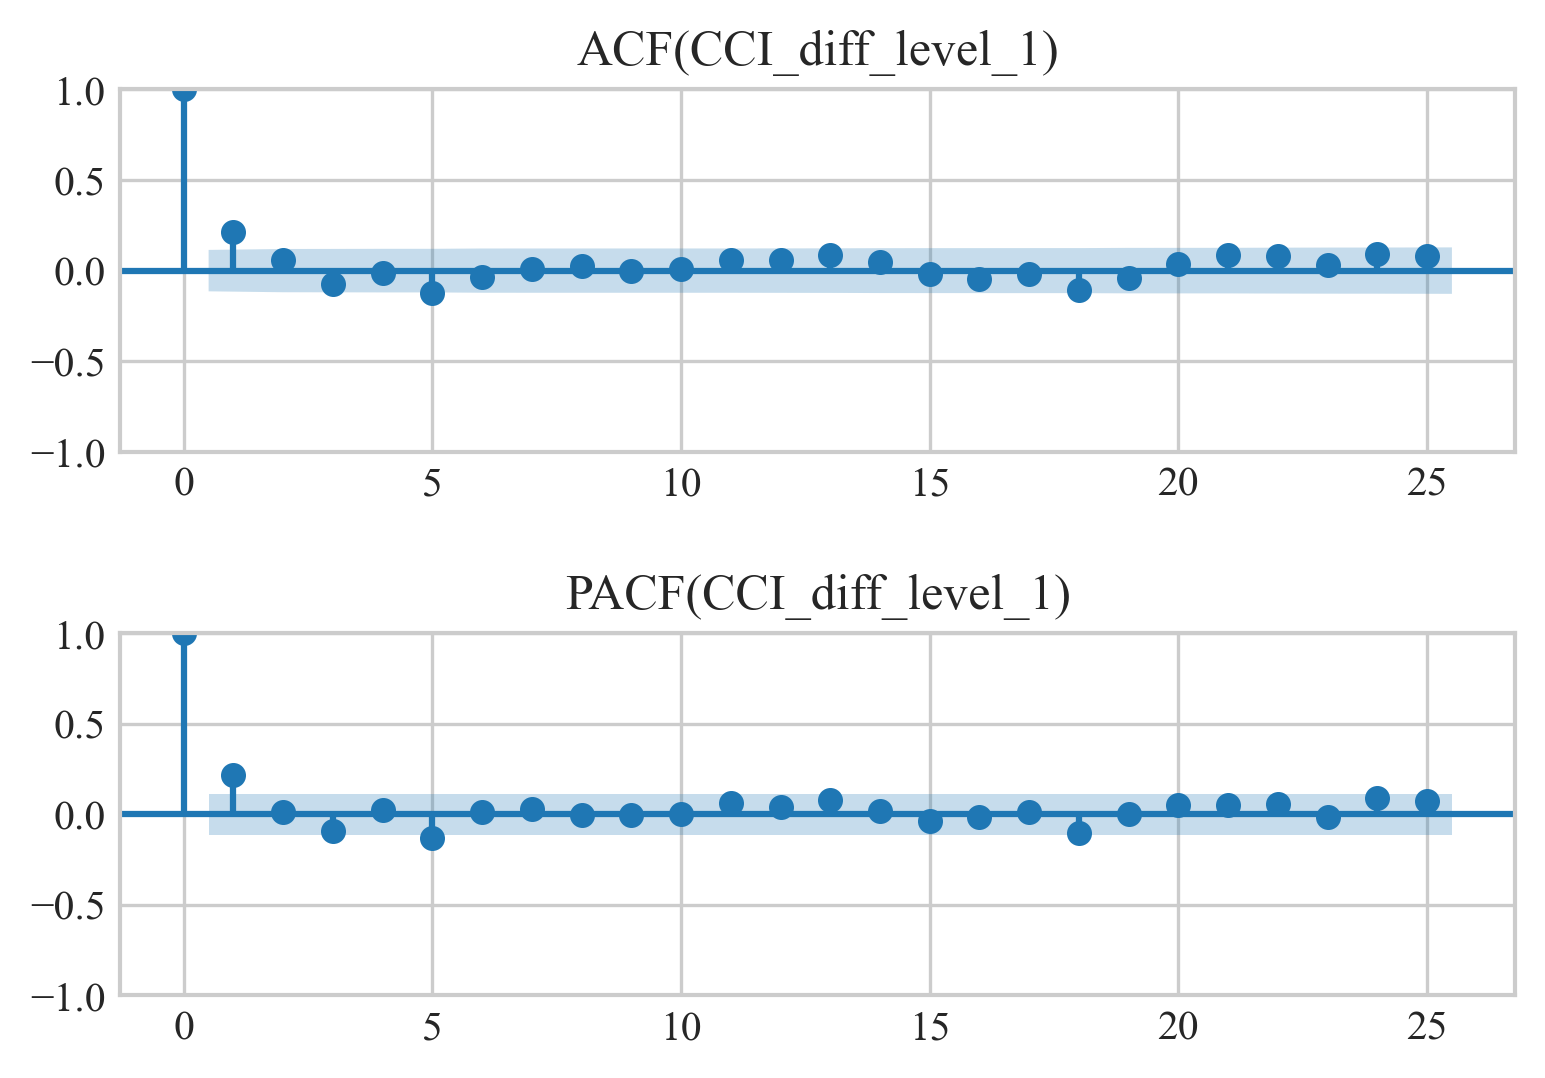

In [162]:
fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
fig.dpi = 300

plot_acf(np.array(diff_ts_l1.diff_series), ax=ax[0])
ax[0].set_title('ACF(CCI_diff_level_1)')
plot_pacf(np.array(diff_ts_l1.diff_series), ax=ax[1])
ax[1].set_title('PACF(CCI_diff_level_1)')
plt.savefig("./fig/CCI_diff_ana.pdf")

In [163]:
dfgls = DFGLS(diff_ts_l1.diff_series, trend='ct')
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -8.723
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.48 (1%), -2.91 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
